**Task 1: Regression**
In this task you are required to apply a machine learning algorithm to the data
set houseprice_data.csv which can be downloaded from the assignment task on
canvas. This data set contains information about house sales in King County, USA.
The data has 18 features, such as: number of bedrooms, bathrooms, floors etc., and
a target variable: house price.
Using linear regression (simple or multiple), develop a model to predict the price
of a house. After developing the model you should also analyse the results and
discuss the effectiveness of the model, outlining the improvements when developing
the model.
Ideas to consider when completing this task:
- Is there a way of visualising your model? (Possibly just one or two input/feature
variable(s).)
- How will you assess the effectiveness of the model?
- Include as many features as you can. Does the model improve?
- How could you make further improvements?
- What can you conclude about your model?

In [8]:
# Libraries to help reading and manipulating data
import pandas as pd
import numpy as np

# libraries to help with visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# libraries to help build Linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [9]:
# To load the data

house_price = pd.read_csv(r"C:\Users\Admin\Desktop\houseprice_data.csv")
house_price

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [100]:
# To check the first 10 rows of the data

house_price.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [44]:
# To ramdomly check any 10 rows in the dataset

house_price.sample(10, random_state = 0)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17384,297000.0,2,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
722,1580000.0,4,3.25,4670,51836,2.0,0,0,4,12,4670,0,1988,0,98005,47.6350,-122.164,4230,41075
2680,562100.0,2,0.75,1440,3700,1.0,0,0,3,7,1200,240,1914,0,98107,47.6707,-122.364,1440,4300
18754,631500.0,2,1.00,1130,2640,1.0,0,0,4,8,1130,0,1927,0,98109,47.6438,-122.357,1680,3200
14554,780000.0,4,2.50,3180,9603,2.0,0,2,3,9,3180,0,2002,0,98155,47.7717,-122.277,2440,15261
16227,485000.0,3,2.50,1650,3436,2.0,0,0,3,7,1650,0,2003,0,98053,47.6819,-122.036,1680,3446
6631,340000.0,3,2.75,1720,28000,1.0,0,0,4,7,1720,0,1958,0,98058,47.4375,-122.176,2000,41817
19813,335606.0,3,2.50,2538,4600,2.0,0,0,3,8,2538,0,2013,0,98092,47.2584,-122.196,2570,4800
3367,425000.0,4,2.50,2460,5440,2.0,0,0,3,9,2460,0,2003,0,98058,47.4480,-122.121,2460,5124
21372,490000.0,5,3.50,4460,2975,3.0,0,2,3,10,3280,1180,2015,0,98119,47.6313,-122.370,2490,4231


In [32]:
# To check the dimension of the data

house_price.shape     

(21608, 19)

- There are 21,613 rows and 19 columns in this data

In [35]:
# To check the data types

house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

**Observations**

- There are 21,613 rows and 19 columns in the data
- There are 5 columns with floats data types(price, bathrooms, floors, lat and long)
- The remaining 14 columns have interger data types
- All the 19 columns have numerical variables
- There is no categorical variable in the data
- The data occuppies the memory space of 3.1MB

In [39]:
# To check the descriptive statistics of the data and transpose the result

house_price.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540182.158793,367362.231718,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


**Observation**
- The maximum price is 7,700,000 dollars
- The minimum price is 75,000 dollars
- The average mean of the price is 540,182
- The median, which is the 50% of the price is 450,000.

In [17]:
# To check the missing values in the data

house_price.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

- There is no missing values in this data

In [10]:
# To create a copy of the data

house = house_price.copy()

In [14]:
# To check for row duplications in the data

house.duplicated().sum()

5

- There are 5 duplicated rows in this data

In [11]:
# To drop the 5 duplicated rows in the data and save it in a new variable name; house

house= house_price.drop_duplicates()

In [48]:
# To check the data dimension after dropping the duplicated rows

house.shape

(21608, 19)

- There are 21,608 rows and 19 columns after dropping the duplicated rows

# Visualisation
### Univarite plots

In [47]:
# To check the descriptive statistics of the target variable

house["price"].describe()

count    2.160800e+04
mean     5.401924e+05
std      3.673996e+05
min      7.500000e+04
25%      3.218375e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

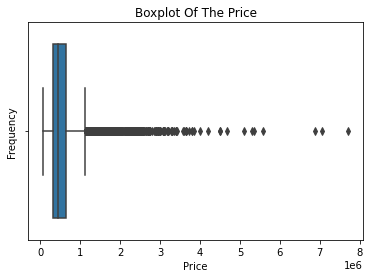

In [55]:
# Box plot to visually view the target "Price"

sns.boxplot(data = house, x = "price");
plt.title("Boxplot Of The Price")
plt.xlabel("Price")
plt.ylabel("Frequency");

**Observations from the boxplot and the descriptive statistics of the target "price" above**

- The distribution is normal.
- The average mean is greater than the median. 
- The right hand skewedness is as a result of upper outliers which are due to high sales prices of some houses.
- The maximum price is 7.7*10^6


In [48]:
# To check the descriptive statistics of the bedrooms

house["bedrooms"].describe()

count    21608.000000
mean         3.370927
std          0.930103
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

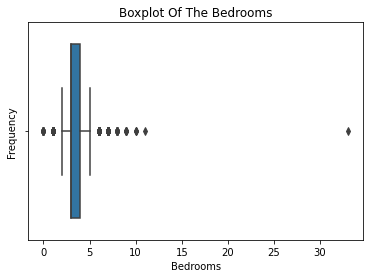

In [56]:
# Box plot to visually view bedrooms variable

sns.boxplot(data = house, x = "bedrooms");
plt.title("Boxplot Of The Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Frequency");

**Observations from the boxplot and the descriptive statistics of bedrooms above**

- The distribution is approximately normal because the average mean and the median are very close
- The skewedness is due to outliers above the upper whisker - which is because some houses have very high number of bedrooms - and below the lower whisker as a result of zero bedrooms in some houses
- The highest number of bedrooms is 33. The least is zero.


In [49]:
# To check the descriptive statistics of the bathrooms variable

house["bathrooms"].describe()

count    21608.000000
mean         2.114738
std          0.770238
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

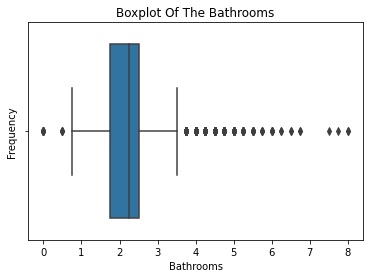

In [58]:
# Box plot to visually view bathrooms variable

sns.boxplot(data = house, x = "bathrooms");
plt.title("Boxplot Of The Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Frequency");

**Observations from the boxplot and the descriptive statistics of bathrooms above**

- The distribution is approximately normal because the average mean and the median are very close
- The skewedness is due to outliers above the upper whisker - which is because some houses have very high number of bathrooms - and below the lower whisker as a result of zero bathrooms in some houses
- The highest number of bedrooms is 8. The least is zero.

# Bivariate plot

### Correlation plot

In [15]:
 # Calling our data, apply correlation method and save it in a new variable; housing

housing = house.corr()
housing

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


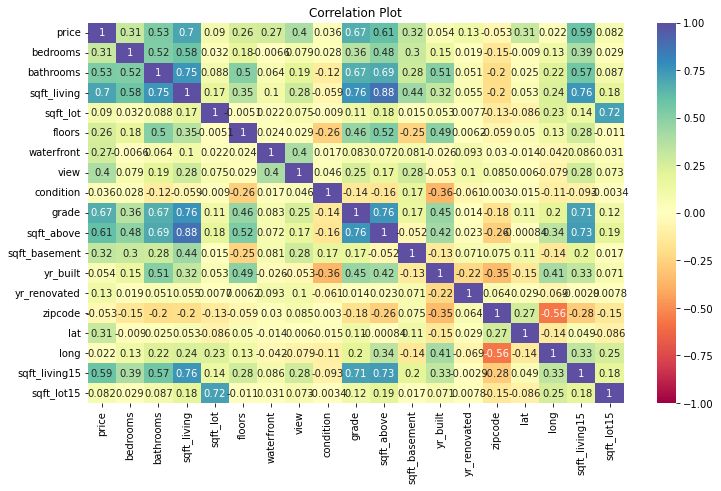

In [92]:
# Heatmap to show relationships among the variables

plt.figure(figsize=(12,7))
sns.heatmap(data =housing, annot= True, vmin= -1, vmax=1, cmap= "Spectral");
plt.title("Correlation Plot")
plt.show();

**Observations**
- sqft_living shows moderate positive correlation with the target variable, price at 0.7 (twice)
- Bathrooms, grade, sqft_above, and sqft_living15 also show positive correlation with price at 0.53, 0.67, 0.61 and 0.59 respectively
- The highest correlation in the plot is a positive correlation between sqft_above and sqft_lot at 0.88 (twice)

#### Interpretation
- For any two variables with positive correlation, one increases as the other increases.

#### Conclusion
- All the variables listed above show moderate positive correlation with the price. Since there is no high positive correlation, all the variables will be adopted in building the regression model.


### Scatter Plot

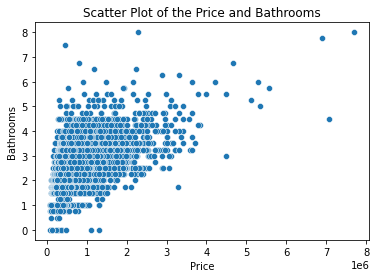

In [87]:
# scatter plot to visually view relationships between the target "Price" and Bathrooms variable

sns.scatterplot(data= house, x ="price", y = "bathrooms");
plt.title("Scatter Plot of the Price and Bathrooms")
plt.xlabel("Price")
plt.ylabel("Bathrooms")
plt.show();

**Observation**
- Some of the houses with the highest price also have the highest number of bathrooms
- The house with the highest number of bathrooms has price of above 5.0*10^6

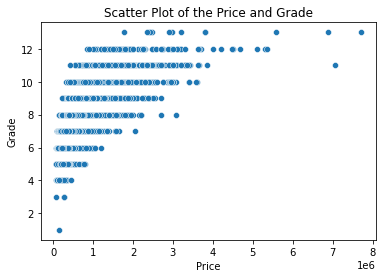

In [108]:
# scatter plot to visually view relationships between the target and "grade"

sns.scatterplot(data= house, x ="price", y = "grade");
plt.title("Scatter Plot of the Price and Grade")
plt.xlabel("Price")
plt.ylabel("Grade")
plt.show();

**Observation**
- Some of the highest grades have the highest prices
- As the grade increases, so the price.
- As the grade increases, so the grade density and it is proportional to the price.

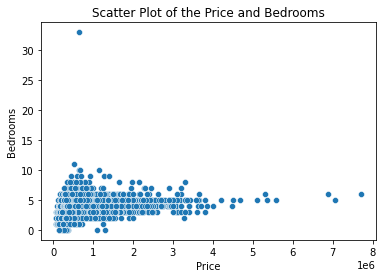

In [88]:
# scatter plot to visually view relationships between the target and bedrooms variable

sns.scatterplot(data= house, x ="price", y = "bedrooms");
plt.title("Scatter Plot of the Price and Bedrooms")
plt.xlabel("Price")
plt.ylabel("Bedrooms")
plt.show();

**Observation**
- The house with the highest number of bedrooms has price of 1 *  10^6 by approximation
- The highest-priced house has 5 bedrooms 

## To build the multiple linear regression model...

In [12]:
# To check the dimension of the data

house.shape

(21608, 19)

- There are 21,608 rows and 19 columns

In [13]:
# Dropping the target variable "Price" & assign new variable name "X" to the independent variables

X = house.drop("price", axis =1)

In [14]:
# Assigning new variable to the target "Price"

y = house["price"]

In [17]:
# To split data into 80% for training data and 20% for testing data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [72]:
 # To check the dimension of the target training data

x_train.shape

(17286, 18)

- There are 17,286 rows and 18 columns in the target training data 

In [73]:
# To check the dimension of the target testing data

x_test.shape

(4322, 18)

- There are 4,322 rows and 18 columns in the testing data

In [18]:
# To create an instance of the StandardScaler in order to standardise the data

scaler = StandardScaler()

# For scaler to calculate and convert each variable to have a mean and varaince of 0 and 1, and save it in a new name
    
x_train_scaler = scaler.fit_transform(x_train)


x_test_scaler = scaler.transform(x_test)

In [19]:
# To instantiate linear regression

lr = LinearRegression()

# To build the model

lr.fit(x_train_scaler, y_train)

LinearRegression()

In [80]:
# To know the values of the coefficients

lr.coef_

array([-32389.12838008,  29029.38754926,  83821.39108927,   6899.32302859,
         3535.23078344,  55306.43233245,  39481.38127597,  17844.90306755,
       114377.84148342,  78293.74869089,  27437.15898249, -74626.21426037,
         8943.08263731, -32780.86241402,  83440.48824085, -32335.88978169,
        13436.23860164, -11853.64298824])

In [81]:
# To iterate through the coefficients in order to know the coefficent of each independent variable

for idx, col_name in enumerate(X.columns):           
    print(f"{col_name} has coefficient of {lr.coef_[idx]}")

bedrooms has coefficient of -32389.128380080736
bathrooms has coefficient of 29029.387549261268
sqft_living has coefficient of 83821.39108927085
sqft_lot has coefficient of 6899.323028587228
floors has coefficient of 3535.2307834365897
waterfront has coefficient of 55306.4323324534
view has coefficient of 39481.38127596701
condition has coefficient of 17844.903067551186
grade has coefficient of 114377.84148341918
sqft_above has coefficient of 78293.74869088545
sqft_basement has coefficient of 27437.158982493176
yr_built has coefficient of -74626.21426036612
yr_renovated has coefficient of 8943.082637309037
zipcode has coefficient of -32780.86241402225
lat has coefficient of 83440.48824085046
long has coefficient of -32335.889781692804
sqft_living15 has coefficient of 13436.23860164155
sqft_lot15 has coefficient of -11853.642988236112


**Interpretation of the coefficients**

- The independent variable "grade" has the highest positive coefficient of 114,377 which means any unit increase in 
grade variable wll cause 114377% increase in the dependent variable "Price"
- The yr_built has negative coefficient of -74626, meaning any unit decrease in this variable will cause 74626%
decrease in the dependent variable "price".

In [20]:
# function to compute different metrics to check performance of a regression model

def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model

def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

# predicting using the independent variables

    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

# creating a dataframe of metrics

    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

###  To check the linear regression model training performance

In [22]:
# To know the performance of the train data

df_perf = model_performance_regression(lr, x_train_scaler, y_train)

df_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,202968.250542,127185.713858,0.70211,0.701799


**The train data has...**
- Root mean squared error of 202968
- Mean absolute error of 127186
- R-squared of 0.70211
- Adjusted R-squared of 0.701799

## Interpretation
- The R-squared of 70% means that 70% variation of the dependent variable "Price" is explained by the independent variables.

###  To check the linear regression model testing performance

In [23]:
# To know the performance of the test data

df_test = model_performance_regression(lr, x_test_scaler, y_test)

df_test

,RMSE,MAE,R-squared,Adj. R-squared
0,194793.60017,124447.901426,0.688186,0.686881


**The test data has...**
- Root mean squared error of 194794
- Mean absolute error of 124448
- R-squared of 0.688186
- Adjusted R-squared of 0.686881

## Interpretation
- The R-squared of 68% means that 68% variation of the dependent variable "Price" is explained by the independent variables.

## Conclusion
- The regression model under-fits.
This means that the model did not perform well on the training and on the testing data because 68% performance is too low

### Using ridge regression to improve the model....

In [36]:
# from the library, import the ridge algorithm

from sklearn.linear_model import Ridge

# instantiate the model and set the regularisation strenghth of alpha to 0.05

ridge = Ridge(alpha = 0.05, random_state = 0)

# To train the model

ridge.fit(x_train_scaler, y_train)

Ridge(alpha=0.05, random_state=0)

###  To check the ridge regression model training performance

In [37]:
# To check the ridge model's training performance

df_perf2 = model_performance_regression(ridge, x_train_scaler, y_train)

df_perf2

,RMSE,MAE,R-squared,Adj. R-squared
0,202968.250544,127185.603045,0.70211,0.701799


**From above**

- The R-squared is 70%
- The adjusted R-squared is also 70%

### Interpretation

- The R-squared of 70% means that 70% variation of the dependent variable "Price" is explained by the independent variables.

### When compared with linear regression model's training performance

- The performance remains the same as linear regression model in the training performance

##  To check the ridge regression model's testing performance

In [25]:
# To check the ridge model's testing performance

df_test2 = model_performance_regression(ridge, x_test_scaler, y_test)

df_test2

,RMSE,MAE,R-squared,Adj. R-squared
0,194793.566306,124447.77959,0.688186,0.686882


**From above**

- The R-squared is 69%
- The adjusted R-squared is also 69%

### Interpretation

- The R-squared of 69% means that 69% variation of the dependent variable "Price" is explained by the independent variables.

### When compared with linear regression model's testing performance

- There is no difference in the testing performance of ridge regression model when compared with the linear regression model.
The R-squared and the Adjusted R-squared are exactly the same.

## Using lasso to improve the model....

In [44]:
# from the library, import the lasso algorithm

from sklearn.linear_model import Lasso

# To create an instant of lasso regression and set the regularisation strenghth of alpha to 0.8

lasso = Lasso(alpha = 0.8, random_state = 0)

# To build lasso model

lasso.fit(x_train_scaler, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.201e+13, tolerance: 2.391e+11
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.8, random_state=0)

## To check the lasso regression model's training performance

In [45]:
# To check the lasso model's training performance

df_perf3 = model_performance_regression(lasso, x_train_scaler, y_train)

df_perf3

,RMSE,MAE,R-squared,Adj. R-squared
0,202968.250609,127185.690396,0.70211,0.701799


**From above**

- The R-squared is 70%
- The adjusted R-squared is also 70%

### Interpretation

- The R-squared of 70% means that 70% variation of the dependent variable "Price" is explained by the independent variables.

### When compared with linear regression & ridge models' training performances

- The performance remains the same as linear regression and ridge regression models in the training performances. 
The R-squared and the adjusted R-squared have the exact scores as these other two models in their training performances.

## To check the lasso regression model's testing performance

In [46]:
# To check the lasso model's testing performance

df_test3 = model_performance_regression(lasso, x_test_scaler, y_test)

df_test3

,RMSE,MAE,R-squared,Adj. R-squared
0,194793.661459,124447.779359,0.688186,0.686881


**From above**

- The R-squared is 69%
- The adjusted R-squared is also 69%

## Interpretation

- The R-squared of 69% means that 69% variation of the dependent variable "Price" is explained by the independent variables.

## When compared with linear regression & ridge models' testing performances

- The performance remains the same as linear regression and ridge regression models in the testing performances. 
The R-squared and the adjusted R-squared have the exact scores as these other two models in their testing performances.